<center>

# Program No. 1
</center>

### <strong> Objective: </strong> Design a single unit perceptron for classification of a linearly separable binary dataset without using pre-defined models.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the loan approval dataset
df = pd.read_csv('loan_approval_dataset.csv')

print("Loan Approval Prediction Model")
print("=" * 30)
print(f"Dataset shape: {df.shape}")
print("\nSample data:")
print(df.head())

Loan Approval Prediction Model
Dataset shape: (39, 3)

Sample data:
   annual_income  debt_to_income_ratio  loan_approved
0          41.08                 37.29            0.0
1          47.85                 37.53            0.0
2          57.57                 39.43            0.0
3          41.59                 44.01            0.0
4          33.20                 38.66            0.0


In [14]:
# Extract features and target
X = df[['annual_income', 'debt_to_income_ratio']].values
y = df['loan_approved'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

# Scale the features for better convergence
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Create and train the perceptron model
perceptron = Perceptron(max_iter=1000, tol=1e-3, eta0=0.1, random_state=42)
perceptron.fit(X_train_scaled, y_train)

# Make predictions
y_pred = perceptron.predict(X_test_scaled)

In [16]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\nModel Performance:")
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Model Performance:
Accuracy: 0.9167

Confusion Matrix:
[[5 0]
 [1 6]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91         5
         1.0       1.00      0.86      0.92         7

    accuracy                           0.92        12
   macro avg       0.92      0.93      0.92        12
weighted avg       0.93      0.92      0.92        12



In [17]:
# Get decision boundary parameters
weights = perceptron.coef_[0]
bias = perceptron.intercept_[0]
print("\nModel Parameters:")
print(f"Weight for Annual Income: {weights[0]:.4f}")
print(f"Weight for Debt-to-Income Ratio: {weights[1]:.4f}")


Model Parameters:
Weight for Annual Income: 0.2039
Weight for Debt-to-Income Ratio: -0.2021


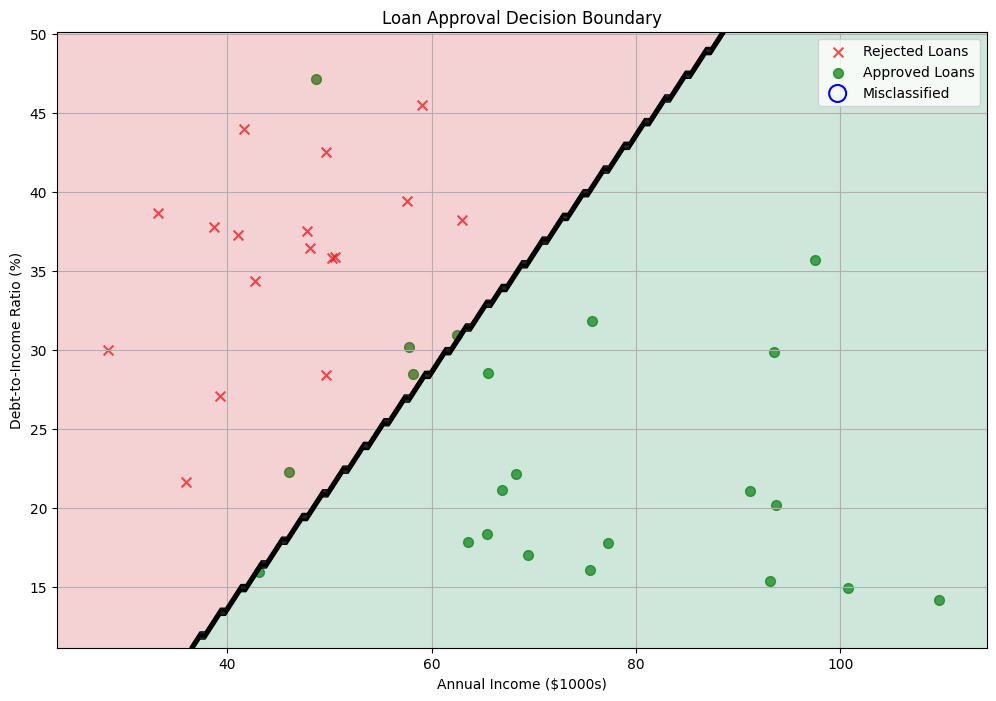

In [13]:
plt.figure(figsize=(12, 8))

plt.scatter(X[y == 0, 0], X[y == 0, 1],
            label='Rejected Loans', alpha=0.7, marker='x', color='red', s=50)
plt.scatter(X[y == 1, 0], X[y == 1, 1],
            label='Approved Loans', alpha=0.7, marker='o', color='green', s=50)

income_min, income_max = X[:, 0].min() - 5, X[:, 0].max() + 5
debt_min, debt_max = X[:, 1].min() - 3, X[:, 1].max() + 3

xx, yy = np.meshgrid(np.arange(income_min, income_max, 0.5),
                     np.arange(debt_min, debt_max, 0.5))
mesh_points = np.c_[xx.ravel(), yy.ravel()]
mesh_scaled = scaler.transform(mesh_points)

Z = perceptron.predict(mesh_scaled)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.RdYlGn)
plt.contour(xx, yy, Z, colors='k', linewidths=1.0)
misclassified_idx = y_test != y_pred
plt.scatter(X_test[misclassified_idx, 0], X_test[misclassified_idx, 1],
            s=150, linewidth=1.5, facecolors='none', edgecolors='blue',
            label='Misclassified')

plt.xlabel('Annual Income ($1000s)')
plt.ylabel('Debt-to-Income Ratio (%)')
plt.title('Loan Approval Decision Boundary')
plt.legend(loc='upper right')
plt.grid(True)

plt.show()


In [8]:
def predict_loan_approval(annual_income, debt_to_income_ratio):
    features = np.array([[annual_income, debt_to_income_ratio]])
    features_scaled = scaler.transform(features)
    prediction = perceptron.predict(features_scaled)[0]
    raw_score = np.dot(features_scaled, weights.T) + bias
    probability = 1 / (1 + np.exp(-raw_score[0]))

    return int(prediction), probability


# Example usage of the prediction function
print("\nPredicting Loan Approval for New Applicants")
print("=" * 43)

while True:
    try:
        income = int(input("Enter annual income in thousands of dollars: "))
        break
    except ValueError:
        print("Invalid input. Please enter a valid integer for annual income.")

while True:
    try:
        debt_ratio = int(input("Enter debt-to-income ratio as a percentage: "))
        break
    except ValueError:
        print("Invalid input. Please enter a valid integer for debt-to-income ratio.")
prediction, confidence = predict_loan_approval(income, debt_ratio)
status = "Approved" if prediction == 1 else "Rejected"

print(f"Applicant with ${income},000 income and {debt_ratio}% \
        debt ratio: {status} (confidence: {confidence:.2f})")


Predicting Loan Approval for New Applicants
Enter annual income in thousands of dollars: 30000
Enter debt-to-income ratio as a percentage: 50
Applicant with $30000,000 income and 50%         debt ratio: Approved (confidence: 1.00)
